## Sales Analysis

###### All data is open sourced. Below is presented analysis to answer four business related questions.

In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#to see the most commonly paired items
from itertools import combinations
from collections import Counter

In [13]:
def max_with_index(series):
    return (series.idxmax(), series.max())

In [14]:
df = pd.read_csv('./PROJ1_Sales_data/Sales_April_2019.csv')

files = [file for file in os.listdir('./PROJ1_Sales_data')]

all_months_data = pd.DataFrame()

for file in files:
    df = df = pd.read_csv('./PROJ1_Sales_data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)
all_data = pd.read_csv("all_data.csv")


#### Question 1: What was the best month for sales? How much was earned that month?

In [15]:
all_data = all_data.dropna(how = 'all')
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [16]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [17]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

In [18]:
all_data['Sales'] = (all_data['Price Each'] * all_data['Quantity Ordered'])/1000000

In [19]:
grouped_data = all_data.groupby('Month').sum()
grouped_data.head()
# max_with_index(grouped_data['Sales'])

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257
2,13449,2.188885e+06,2.202022
3,17005,2.791208e+06,2.807100
4,20558,3.367671e+06,3.390670
5,18667,3.135125e+06,3.152607


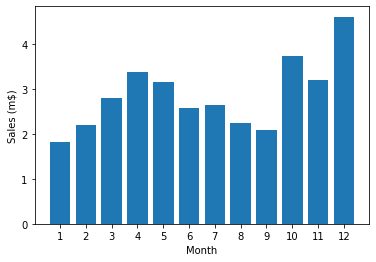

In [21]:
months = range(1,13)
plt.bar(months,grouped_data['Sales'])
plt.xticks(months)
plt.ylabel('Sales (m$)')
plt.xlabel('Month')
plt.show()

#### Question 2: What city has the most sales?

In [23]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x)+ ' (' + get_state(x) + ')'"")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,0.001700,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,0.000600,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,0.000012,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,0.000150,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,0.000012,Atlanta (GA)


In [24]:
grouped_data = all_data.groupby('City').sum()
grouped_data

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499
Austin (TX),11153,1.809874e+06,69829,1.819582
Boston (MA),22528,3.637410e+06,141112,3.661642
Dallas (TX),16730,2.752628e+06,104620,2.767975
Los Angeles (CA),33289,5.421435e+06,208325,5.452571
New York City (NY),27932,4.635371e+06,175741,4.664317
Portland (ME),2750,4.471893e+05,17144,0.449758
Portland (OR),11303,1.860558e+06,70621,1.870732
San Francisco (CA),50239,8.211462e+06,315520,8.262204


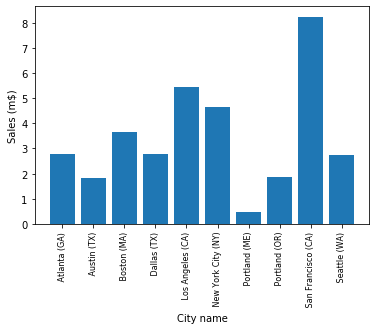

In [25]:
#Present in alphabetical order
cities = [city for city, df in all_data.groupby('City')]

# cities = all_data['City'].unique()

plt.bar(cities, grouped_data['Sales'])
plt.xticks(cities, rotation='vertical', size = 8)
plt.ylabel('Sales (m$)')
plt.xlabel('City name')
plt.show()

#### Question 3: What time should the advertisements be displayed to maximise likelihood of customer's buying the product?

In [26]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

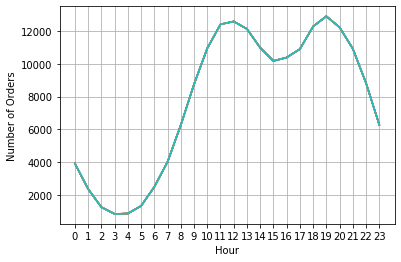

In [34]:
hours = [hour for hour, df in all_data.groupby('Hour')]
#Plot the number of occurencies of purchases
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#### Question 4: What products are most often sold together?

In [29]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped_products'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped_products']].drop_duplicates()
df.head(100)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped_products
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
2297,297847,"iPhone,Lightning Charging Cable"
2345,297894,"USB-C Charging Cable,AA Batteries (4-pack)"
2347,297895,"USB-C Charging Cable,27in FHD Monitor"
2398,297945,"Vareebadd Phone,USB-C Charging Cable,Bose Soun..."


In [30]:
# count with itertools and a Counter
count = Counter()
for row in df['Grouped_products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) #most common 2 things sold together

for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Questions 5: What product sold the most?

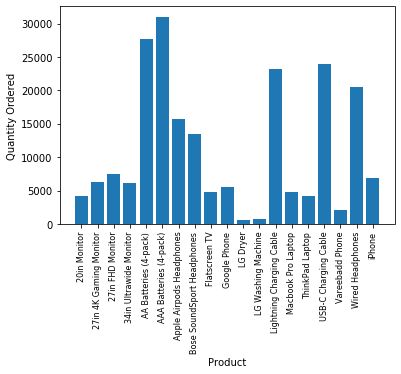

In [31]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size = 8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

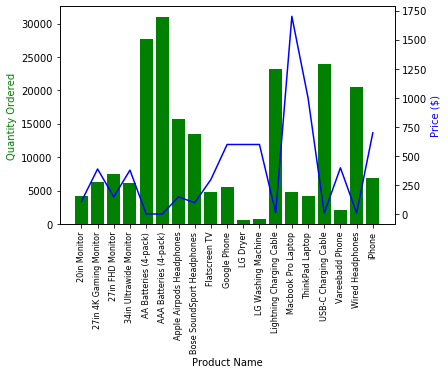

In [33]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()